***

# Example Notebook - Artist definitions

***

In this notebook the customization of artists is shown in a couple of examples.

1. [Simple artist](#simple-artist)
1. [PyMOL artist](#pymol-artist)
1. [DSSP artist](#dssp-artist)
1. [STRIDE artist](#stride-artist)

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

from secstructartist import draw_secondary_structure
from secstructartist.artists import (
    SecStructArtist, 
    ElementArtist, 
    primitives as prim,
)

## Simple Artist

A simple artist for the three most common secondary structure elements:
* H - Helix
* S - Sheet
* L - Loop

This artist is available using the `simple` keyword:

```python
    # Secondary structure string
    secstruct_str = (
        "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
        "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
        "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
    )

    # Draw figure
    draw_secondary_structure(secstruct_str, artist='simple')
```

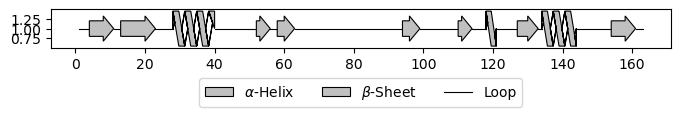

In [2]:
#
# --- Secondary structure string
#
secstruct_str = (
    "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
    "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
    "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
)

#
# --- Definition of the Element artists
#
H = ElementArtist([
        prim.HelixPrimitive(        # Helix artist
            fillcolor='silver',
            linecolor='black',
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = False,
        ),
    ], r'$\alpha$-Helix'
)
S = ElementArtist([
        prim.ArrowPrimitive(
            fillcolor='silver',
            linecolor='black', 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length =3
        )
    ], r'$\beta$-Sheet'
)
L = ElementArtist([
        prim.LinePrimitive(
            linecolor="#000000", 
            linewidth_scalar = 1
        )
    ], 'Loop'
)

#
# --- Artist setup
#
simple_mapping = {
    'H': H, 
    'S': S, 
    'L': L
}
simple_artist = SecStructArtist(simple_mapping, linewidth=.8, zorder=5)
# simple_artist.to_config('../src/secstructartist/config/simple.yaml')

#
# --- Draw
#
# Draw with artist
fig, ax = plt.subplots(figsize=(8,.5), subplot_kw={
    'projection': 'secstruct'
})
ax.draw_secondary_structure(secstruct_str, artist=simple_artist)
ax.legend(
    loc='upper center', bbox_to_anchor=(.5, -.6), 
    ncols = 3,
)

## PyMOL Artist

Another artist for the three most common secondary structure elements:
* H - Helix
* S - Sheet
* L - Loop

This artist is available using the `default` keyword:

```python
    # Secondary structure string
    secstruct_str = (
        "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
        "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
        "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
    )

    # Draw figure
    draw_secondary_structure(secstruct_str, artist='pymol')
```

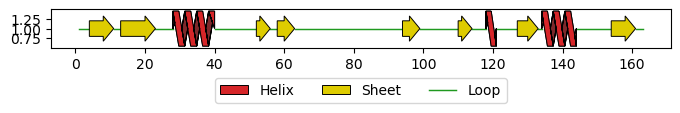

In [3]:
#
# --- Secondary structure string
#
secstruct_str = (
    "LLLSSSSSSSLLSSSSSSSSSSLLLLLHHHHHHHHHHHHLLLLLLLLLLLLSSSSLLS"
    "SSSSLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLSSSSSLLLLLLLLLLLSSSSLLL"
    "LHHHLLLLLLSSSSSSLHHHHHHHHHHLLLLLLLLLLSSSSSSSLL"
)

#
# --- Definition of the Element artists
#
H = ElementArtist([
        prim.HelixPrimitive(        # Helix artist
            fillcolor = [0.84, 0.15, 0.16],
            linecolor = [0., 0., 0.], 
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(        # Helix artist
            fillcolor = [.49, .16, .17],
            linecolor = [0., 0., 0.], 
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = True,
            zorder_offset = -.1,
        )
    ], r'Helix'
)
S = ElementArtist([
        prim.ArrowPrimitive(
            fillcolor = [.87, .8, 0.],
            linecolor = [0., 0., 0.], 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length = 3
        )
    ], r'Sheet'
)
L = ElementArtist([
        prim.LinePrimitive(
            linecolor = [.12, .60, .12],
            linewidth_scalar = 1.5
        )
    ], 'Loop'
)

#
# --- Artist setup
#
pymol_mapping = {
    'H': H, 
    'S': S, 
    'L': L
}
pymol_artist = SecStructArtist(pymol_mapping, linewidth=.7, zorder=5)
# pymol_artist.to_config('../src/secstructartist/config/pymol_artist.yaml')

#
# --- Draw
#
fig, ax = plt.subplots(figsize=(8,.5), subplot_kw={
    'projection': 'secstruct'
})
ax.draw_secondary_structure(secstruct_str, artist=pymol_artist)
ax.legend(
    loc='upper center', bbox_to_anchor=(.5, -.6), 
    ncols = 3,
)

## DSSP artist

This artist was designed to facilitate working with DSSP secondary structure
annotations:
 
| Symbol | Sec. Struct. Element    | Symbol | Sec. Struct. Element             |
|--------|-------------------------|--------|----------------------------------|
| `'H'`  | $\alpha$-Helix          | `'G'`  | $3_{10}$-Helix                   |
| `'I'`  | $\pi$-Helix             | `'P'`  | $\kappa$-Helix (Polyproline II)  |
| `'E'`  | Extended $\beta$-strand | `'B'`  | $\beta$-Bridge                   |
| `'T'`  | H-bonded turn           | `'S'`  | Bend                             |
| `' '`, `'C'`, `'c'`  | Loop      |        |                                  |

This artist is available using the `dssp` keyword:

```python
    # Secondary structure string
    secstruct_str = (
        '    SEEEEEEEEESS GGG   EEEEEEEEEEHHHHHTSPPP SSSPPPPPPPSS BB'
        'BBBB   SSPPPHHHHIII   HHHHHHTT   '
    )

    # Draw figure
    draw_secondary_structure(secstruct_str, artist='dssp')
```

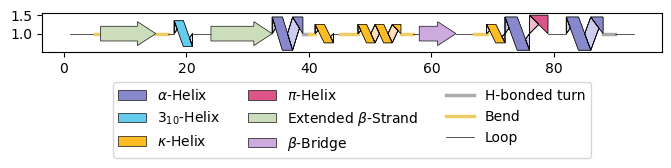

In [15]:
#
# --- Secondary structure string
#
secstruct_str = (
    '    SEEEEEEEEESS GGG   EEEEEEEEEEHHHHHTSPPP SSSPPPPPPPSS BB'
    'BBBB   SSPPPHHHHIII   HHHHHHTT   '
)

#
# --- Definition of the Element artists
#
H = ElementArtist([
        prim.HelixPrimitive(
            fillcolor='#8888cc',
            linecolor='#111111',
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#ccccee",
            linecolor='#111111',
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$\alpha$-Helix'
)
G = ElementArtist([
        prim.HelixPrimitive(
            fillcolor='#66ccee',
            linecolor='#111111',
            height_scalar=.7, 
            ribbon_period = 3.0,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#bbeeee",
            linecolor='#111111',
            height_scalar=.7, 
            ribbon_period = 3.0,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$3_{10}$-Helix'
)
P = ElementArtist([
        prim.HelixPrimitive(
            fillcolor='#ffbb22',
            linecolor='#111111',
            height_scalar=.5, 
            ribbon_period = 3.0,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#ffddbb",
            linecolor='#111111',
            height_scalar=.5, 
            ribbon_period = 3.0,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$\kappa$-Helix'
)
I = ElementArtist([
        prim.HelixPrimitive(
            fillcolor='#dd5588',
            linecolor='#111111',
            height_scalar=1., 
            ribbon_period = 4.1,
            fill_inner_ribbon = False,
        ),
            prim.HelixPrimitive(
            fillcolor="#eebbcc",
            linecolor='#111111',
            height_scalar=1., 
            ribbon_period = 4.1,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$\pi$-Helix'
)
B = ElementArtist([
        prim.ArrowPrimitive(
            fillcolor='#ccaadd',
            linecolor='#111111', 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length =3
        )
    ], r'$\beta$-Bridge'
)
E = ElementArtist([
        prim.ArrowPrimitive(
            fillcolor='#ccddbb',
            linecolor='#111111', 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length = 3
        )
    ], r'Extended $\beta$-Strand'
)
S = ElementArtist([
        prim.LinePrimitive(
            linecolor = "#eecc66", 
            linewidth_scalar = 5
        )
    ], 'Bend'
)
T = ElementArtist([
        prim.LinePrimitive(
            linecolor="#aaaaaa", 
            linewidth_scalar = 5
        )
    ], 'H-bonded turn'
)
C = ElementArtist([
        prim.LinePrimitive(
            linecolor="#111111", 
            linewidth_scalar = 1
        )
    ], 'Loop'
)

#
# --- Artist setup
#
dssp_mapping = {
    'H': H, 'G': G, 'P': P, 'I': I,
    'E': E, 'B': B, 'b': B, 
    'T': T, 'S': S, 
    'C': C, 'c': C, ' ': C,
}
dssp_artist = SecStructArtist(dssp_mapping, linewidth=.5, zorder=5)
# dssp_artist.to_config('../src/secstructartist/config/dssp.yaml')

#
# --- Draw
#
fig, ax = plt.subplots(figsize=(8,.5), subplot_kw={
    'projection': 'secstruct'
})
ax.draw_secondary_structure(secstruct_str, artist=dssp_artist)
ax.legend(
    loc='upper center', bbox_to_anchor=(.5, -.6), 
    ncols = 3,
)

## STRIDE artist

This artist was designed to facilitate working with DSSP secondary structure
annotations:
 
| Symbol | Sec. Struct. Element    | Symbol | Sec. Struct. Element             |
|--------|-------------------------|--------|----------------------------------|
| `'H'`  | $\alpha$-Helix          | `'G'`  | $3_{10}$-Helix                   |
| `'I'`  | $\pi$-Helix             | `'P'`  | $\kappa$-Helix (Polyproline II)  |
| `'E'`  | Extended $\beta$-strand | `'B'`, `'b'`  | Isolated $\beta$-bridge   |
| `'T'`  | H-bonded turn           | `'S'`  | Bend                             |
| `' '`, `'C'`, `'c'` | Loop       |        |                                  |

This artist is available using the `dssp` keyword:

```python
    # Secondary structure string
    secstruct_str = (
        '    SEEEEEEEEESS GGG   EEEEEEEEEEHHHHHTSPPP SSSPPPPPPPSS BB'
        'BBBB   SSPPPHHHHIII   HHHHHHTT   '
    )

    # Draw figure
    draw_secondary_structure(secstruct_str, artist='stride')
```

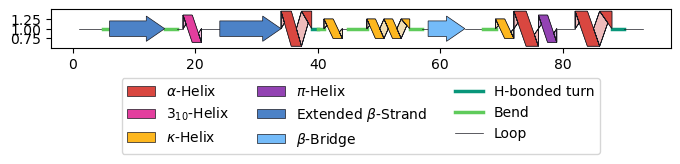

In [21]:
#
# --- Secondary structure string
#
secstruct_str = (
    '    SEEEEEEEEESS GGG   EEEEEEEEEEHHHHHTSPPP SSSPPPPPPPSS BB'
    'BBBB   SSPPPHHHHIII   HHHHHHTT   '
)
#
# --- Definition of the Element artists
#
H = ElementArtist([
        prim.HelixPrimitive(
            fillcolor="#d94740",
            linecolor="#191921",
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#eebbbb",
            linecolor='#191921',
            height_scalar=.9, 
            ribbon_period = 3.6,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$\alpha$-Helix'
)
G = ElementArtist([
        prim.HelixPrimitive(
            fillcolor="#e33e9e",
            linecolor='#191921',
            height_scalar=.7, 
            ribbon_period = 3.0,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#edb7d6",
            linecolor='#191921',
            height_scalar=.7, 
            ribbon_period = 3.0,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$3_{10}$-Helix'
)
P = ElementArtist([
        prim.HelixPrimitive(
            fillcolor="#fdb71f",
            linecolor='#191921',
            height_scalar=.5, 
            ribbon_period = 3.0,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#f1deb4",
            linecolor='#191921',
            height_scalar=.5, 
            ribbon_period = 3.0,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$\kappa$-Helix'
)
I = ElementArtist([
        prim.HelixPrimitive(
            fillcolor="#9343b3",
            linecolor='#191921',
            height_scalar=.7, 
            ribbon_period = 3.0,
            fill_inner_ribbon = False,
        ),
        prim.HelixPrimitive(
            fillcolor="#cda9db",
            linecolor='#191921',
            height_scalar=.7, 
            ribbon_period = 3.0,
            fill_inner_ribbon = True,
            zorder_offset = -.5
        )
    ], r'$\pi$-Helix'
)
B = ElementArtist([
        prim.ArrowPrimitive(
            fillcolor="#74bbf9",
            linecolor='#191921', 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length =3
        )
    ], r'$\beta$-Bridge'
)
E = ElementArtist([
        prim.ArrowPrimitive(
            fillcolor="#4c82c7",
            linecolor='#191921', 
            height_scalar = .65,
            height_scalar2 = .4,
            arrow_tip_length = 3
        )
    ], r'Extended $\beta$-Strand'
)
S = ElementArtist([
        prim.LinePrimitive(
            linecolor = "#5fcb5b", 
            linewidth_scalar = 5
        )
    ], 'Bend'
)
T = ElementArtist([
        prim.LinePrimitive(
            linecolor="#09967A", 
            linewidth_scalar = 5
        )
    ], 'H-bonded turn'
)
C = ElementArtist([
        prim.LinePrimitive(
            linecolor="#191921",
            linewidth_scalar = 1
        )
    ], 'Loop'
)

#
# --- Artist setup
#
stride_mapping = {
    'H': H, 'G': G, 'P': P, 'I': I,
    'E': E, 'B': B, 'b': B,
    'T': T, 'S': S, 
    'C': C, 'c': C, ' ': C,
}
stride_artist = SecStructArtist(stride_mapping, linewidth=.5, zorder=5)
# dssp_artist.to_config('../src/secstructartist/config/stride.yaml')

#
# --- Draw
#
fig, ax = plt.subplots(figsize=(8,.5), subplot_kw={
    'projection': 'secstruct'
})
ax.draw_secondary_structure(secstruct_str, artist=stride_artist)
ax.legend(
    loc='upper center', bbox_to_anchor=(.5, -.6), 
    ncols = 3,
)